<a href="https://colab.research.google.com/github/brit228/Lambda-School-DS1-Unit-1-Project/blob/master/Movie_Infographic_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pillow
!pip install wordcloud
!pip install beautifulsoup4
!pip install requests
!pip install nltk
!pip install omdb

In [27]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image, ImageDraw, ImageFont
from urllib.parse import urljoin
from urllib.request import urlopen as uReq
import omdb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

import random
import string
import glob
import os
import datetime
import io
import math
import re

from google.colab import files

files.upload()
files.upload()
files.upload()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

Saving Black_Circle.jpg to Black_Circle.jpg
Saving oscar.png to oscar.png
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
def bg(ind, sections):
	t_height = 0
	for s in sections:
		t_height += s["height"]
		if s["name"] != "":
			t_height += 200
	col1_bool = False
	col2_bool = False
	col1r = None
	col1g = None
	col1b = None
	col2r = None
	col2g = None
	col2b = None
	if len(ind["color1"]) == 6:
		col1r = int(ind["color1"][0:2], 16)
		col1g = int(ind["color1"][2:4], 16)
		col1b = int(ind["color1"][4:6], 16)
		if col1r != None and col1g != None and col1b != None:
			col1_bool = True
	if len(ind["color2"]) == 6:
		col2r = int(ind["color2"][0:2], 16)
		col2g = int(ind["color2"][2:4], 16)
		col2b = int(ind["color2"][4:6], 16)
		if col2r != None and col2g != None and col2b != None:
			col2_bool = True
	col3r = 0
	col3g = 0
	col3b = 0
	if len(ind["color3"]) == 6:
		col3r = int(ind["color3"][0:2], 16)
		col3g = int(ind["color3"][2:4], 16)
		col3b = int(ind["color3"][4:6], 16)
	bkg_img = None
	if col1_bool and col2_bool:
		bkg_img = Image.new('RGBA', (1550, t_height), (255, 255, 255, 255))
		for y in range(t_height):
			ratio = y / (t_height - 1)
			r = ratio * col2r + (1 - ratio) * col1r
			g = ratio * col2g + (1 - ratio) * col1g
			b = ratio * col2b + (1 - ratio) * col1b
			for x in range(1550):
				bkg_img.putpixel((x,y), (int(r), int(g), int(b), 255))
	elif col1_bool:
		bkg_img = Image.new('RGBA', (1550, t_height), (col1r, col1g, col1b, 255))
	elif col2_bool:
		bkg_img = Image.new('RGBA', (1550, t_height), (col2r, col2g, col2b, 255))
	else:
		bkg_img = Image.new('RGBA', (1550, t_height), (255, 255, 255, 255))
	c_height = 0
	d = ImageDraw.Draw(bkg_img)
	fnt = ImageFont.truetype("Monthoers.otf", 100)
	for s in sections:
		if s["name"] != "":
			d.text((100, c_height + 50), s["name"], font=fnt, fill=(col3r, col3g, col3b, 255))
			c_height += 200
		bkg_img.paste(s["img"], (0, c_height), s["img"])
		c_height += s["height"]
	return bkg_img

In [0]:
def title(url, data):
	url = "https://www.rottentomatoes.com{}".format(url)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	title = [t.contents[0] for t in soup.find_all("h1", {"class": "title"})][0].strip()

	fnt = ImageFont.truetype("AROLY.ttf", 100)
	fnt2 = None
	if "font2" in data and title != "":
		if data["font2"] != "":
			try:
				fnt2 = ImageFont.truetype(data["font2"], 100)
			except:
				fnt2 = ImageFont.truetype("antre.otf", 100)

	temp = Image.new('RGBA', (1550, 1550), (255, 255, 255, 0))
	d = ImageDraw.Draw(temp)
	title_width = d.textsize("MOVIE DATA", font=fnt)[0]
	title_width2 = 0
	if title != "":
		title_width2 = d.textsize(title, font=fnt2)[0]

	fnt = ImageFont.truetype("AROLY.ttf", int(1400 * 100 / title_width))
	if "font2" in data and title != "":
		if data["font2"] != "":
			try:
				fnt2 = ImageFont.truetype(data["font2"], int(1400 * 100 / title_width2))
			except:
				fnt2 = ImageFont.truetype("antre.otf", int(1400 * 100 / title_width2))

	temp = Image.new('RGBA', (1550, 1550), (255, 255, 255, 0))
	d = ImageDraw.Draw(temp)
	title_height = d.textsize("MOVIE DATA", font=fnt)[1] + 100
	if title != "":
		title_height2 = d.textsize(title, font=fnt2)[1] + 25

	col1r = 0
	col1g = 0
	col1b = 0
	col2r = 0
	col2g = 0
	col2b = 0
	col1_bool = False
	col2_bool = False
	if len(data["color1"]) == 6:
		col1r = int(data["color1"][0:2], 16)
		col1g = int(data["color1"][2:4], 16)
		col1b = int(data["color1"][4:6], 16)
		if col1r and col1g and col1b:
			col1_bool = True
	if not col1_bool:
		col1r = 0
		col1g = 0
		col1b = 0
	if len(data["color2"]) == 6:
		col2r = int(data["color2"][0:2], 16)
		col2g = int(data["color2"][2:4], 16)
		col2b = int(data["color2"][4:6], 16)
		if col2r and col2g and col2b:
			col2_bool = True
	if not col2_bool:
		col2r = 0
		col2g = 0
		col2b = 0

	height = title_height + title_height2
	a = Image.new('RGBA', (1550, height), (255, 255, 255, 0))
	d = ImageDraw.Draw(a)
	d.text((75,75), "MOVIE DATA", font=fnt, fill=(col1r,col1g,col1b,255))
	if title_height2 != 0:
		d.text((75,title_height), title, font=fnt2, fill=(col2r,col2g,col2b,255))

	return {"name": "", "height": height, "img": a}

In [0]:
def review(url, data):
	def review_tokenize(review_text):
		tokens = nltk.pos_tag(nltk.word_tokenize(review_text))
		filtered_text = ''
		for i in tokens:
			if i[1] == "JJ":
				filtered_text += i[0] + " "
		return filtered_text

	def green_red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
		sid = SentimentIntensityAnalyzer()
		return "hsl({}, 100%, 50%)".format(int(50.0 * sid.polarity_scores(word)["compound"] + 50.0))

	def create_wordcloud(text):
		stopwords = set(STOPWORDS)
		mask = np.array(Image.open("Black_Circle.jpg").resize((500,500)))
		wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", max_words=1000, mask=mask, stopwords=stopwords, margin=5, random_state=1).generate(text)
		wc.recolor(color_func=green_red_color_func)
		return wc.to_image()

	def img_with_label(col, txt, wc):
		col1r = 0
		col1g = 0
		col1b = 0
		col1_bool = False
		if len(col) == 6:
			col1r = int(col[0:2], 16)
			col1g = int(col[2:4], 16)
			col1b = int(col[4:6], 16)
			if col1r and col1g and col1b:
				col1_bool = True
		if not col1_bool:
			col1r = 0
			col1g = 0
			col1b = 0
		img = Image.new('RGBA', (500, 550), (255, 255, 255, 0))
		d = ImageDraw.Draw(img)
		fnt = ImageFont.truetype("Monthoers.otf", 100)
		t_size = d.textsize(txt, font=fnt)[0]
		fnt = ImageFont.truetype("Monthoers.otf", int(400 * 100 / t_size))
		t_size = d.textsize(txt, font=fnt)[1]
		img = Image.new('RGBA', (500, 500 + t_size), (255, 255, 255, 0))
		img.paste(wc, (0,0), wc)
		d = ImageDraw.Draw(img)
		d.text((50, 500), txt, font=fnt, fill=(col1r,col1g,col1b,255))
		return (True, 520 + t_size, img)

	def imdb_reviews(imdbid, col):
		def get_imdb_review_count(url):
			uClient = uReq(url)
			page_html = uClient.read()
			uClient.close()
			page_soup = BeautifulSoup(page_html, "html.parser")
			reviewCount = page_soup.findAll("div",{'class':'header'})
			reviewCount = str(reviewCount)
			badParser = reviewCount.find("Reviews</span")
			reviewCount = reviewCount[:badParser]
			worseParser = (reviewCount.find("n>")+2)
			reviewCount = reviewCount[worseParser:]
			reviewCount = reviewCount.replace(" ", "").replace(",","")
			float(reviewCount)
			return reviewCount

		def get_imdb_page_count(reviewCount):
			max_page = float(reviewCount)
			max_page = math.floor(max_page/25)
			return max_page

		text = ""
		url = "https://www.imdb.com/title/{}/reviews".format(imdbid)
		reviewCount = get_imdb_review_count(url)
		page_count = min(get_imdb_page_count(reviewCount), 20)
		response = requests.get(url)
		broth = BeautifulSoup(response.text,"html.parser")
		soup = broth
		base_ajax_url = urljoin(url, soup.select(".load-more-data")[0]['data-ajaxurl'] + "?ref_=undefined&paginationKey=")
		i = 1
		while i <= page_count:
			next_page = urljoin(url, base_ajax_url + soup.select(".load-more-data")[0]['data-key'])
			response = requests.get(next_page)
			url = next_page
			broth.append( BeautifulSoup(response.text,"html.parser"))
			soup = BeautifulSoup(response.text,"html.parser")
			i+=1
		for item in broth.select(".review-container"):
			review = item.select(".text")[0].text
			text += review + "\n\n"
		if text != "":
			return img_with_label(col, "IMDb User Reviews", create_wordcloud(review_tokenize(text)))
		return (False, 0, None)

	def rotten_c_reviews(url, col):
		text = ""
		r = requests.get(url+"/reviews")
		soup = BeautifulSoup(r.text, 'html.parser')
		for i in range(1, int(soup.find_all(class_="pageInfo")[0].contents[0].split(" ")[-1])+1):
			if i == 1:
				r = requests.get(url+"/reviews")
			else:
				r = requests.get(url+"/reviews?page={}".format(i))
			html_r = r.text
			soup = BeautifulSoup(html_r, 'html.parser')
			for review in soup.find_all(class_="the_review"):
				text += review.contents[0] + "\n\n"
		if text != "":
			return img_with_label(col, "Rotten Tomatoes Critic Reviews", create_wordcloud(review_tokenize(text)))
		return (False, 0, None)

	def rotten_u_reviews(url, col):
		text = ""
		r = requests.get(url+"/reviews?type=user")
		soup = BeautifulSoup(r.text, 'html.parser')
		max_page = min(int(soup.find_all(class_="pageInfo")[0].contents[0].split(" ")[-1]), 20)
		for i in range(1, max_page+1):
			if i == 1:
				r = requests.get(url+"/reviews?type=user")
			else:
				r = requests.get(url+"/reviews?type=user&page={}".format(i))
			html_r = r.text
			soup = BeautifulSoup(html_r, 'html.parser')
			for review in soup.find_all(class_="user_review"):
				text += review.contents[2] + "\n\n"
		if text != "":
			return img_with_label(col, "Rotten Tomatoes User Reviews", create_wordcloud(review_tokenize(text)))
		return (False, 0, None)

	def meta_c_reviews(url, col):
		text = ""
		url = "https://www.imdb.com/title/{}/criticreviews".format(imdbid)
		r = requests.get(url)
		soup = BeautifulSoup(r.text, 'html.parser')
		offsite_url = ""
		for div in soup.find_all("div", {"class": "see-more"}):
			a = div.findChildren("a", {"class": "offsite-link"})
			if len(a) > 0:
				offsite_url = a[0]['href'].split('?')[0]
				break
		if offsite_url != "":
			headers = {'User-Agent':'Mozilla/5.0'}
			r = requests.get(offsite_url+"/critic-reviews",headers=headers)
			soup = BeautifulSoup(r.text, 'html.parser')
			for item in soup.find_all("div", {"class": "summary"}):
				children = item.findChildren("a", {"class": "no_hover"})
				if len(children):
					text += children[0].text + "\n"
			if text != "":
				return img_with_label(col, "Metacritic Critic Reviews", create_wordcloud(review_tokenize(text)))
		return (False, 0, None)

	def meta_u_reviews(url, col):
		text = ""
		url = "https://www.imdb.com/title/{}/criticreviews".format(imdbid)
		r = requests.get(url)
		soup = BeautifulSoup(r.text, 'html.parser')
		offsite_url = ""
		for div in soup.find_all("div", {"class": "see-more"}):
			a = div.findChildren("a", {"class": "offsite-link"})
			if len(a) > 0:
				offsite_url = a[0]["href"].split('?')[0]
		if offsite_url != "":
			headers = {'User-Agent':'Mozilla/5.0'}
			r = requests.get(offsite_url+"/user-reviews",headers=headers)
			soup = BeautifulSoup(r.text, 'html.parser')
			for item in soup.find_all("span", {"class": "blurb_expanded"}):
				text += item.text.strip() + "\n"
			if text != "":
				return img_with_label(col, "Metacritic User Reviews", create_wordcloud(review_tokenize(text)))
		return (False, 0, None)

	imdbid = ""
	url = "https://www.rottentomatoes.com{}".format(url)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	title = [t.contents[0] for t in soup.find_all("h1", {"class": "title"})][0].strip()
	year = int(re.sub("[^0-9]", "", [t.contents[0] for t in soup.find_all("span", {"class": "year"})][0].strip()))
	omdb.set_default('apikey', "c41970a")
	for movie in omdb.get(search=title.split(" ")[-1], year=year):
		out = omdb.get(imdbid=movie["imdb_id"], tomatoes=True)
		if out["tomato_url"][-1] != "/":
			if out["tomato_url"].split("/")[-1] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break
		else:
			if out["tomato_url"].split("/")[-2] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break

	col = ""
	if "color1" in data:
		col = data["color1"]

	images = []
	if data["review_places_imdb_u"]:
		if imdbid != "":
			images.append(imdb_reviews(imdbid, col))
	if data["review_places_rotten_c"]:
		images.append(rotten_c_reviews(url, col))
	if data["review_places_rotten_u"]:
		images.append(rotten_u_reviews(url, col))
	if data["review_places_meta_c"]:
		if imdbid != "":
			images.append(meta_c_reviews(imdbid, col))
	if data["review_places_meta_u"]:
		if imdbid != "":
			images.append(meta_u_reviews(imdbid, col))

	images = [image for image in images if image[0]]

	if len(images) == 0:
		return {"name": "", "height": 1, "img": Image.new('RGBA', (1550, 1), (255, 255, 255, 0))}
	elif len(images) == 1:
		a = Image.new('RGBA', (1550, images[0][1]), (255, 255, 255, 0))
		a.paste(images[0][2], (500,0), images[0][2])
		return {"name": "Review Word Cloud", "height": images[0][1], "img": a}
	elif len(images) == 2:
		height = 0
		for image in images:
			if height < image[1]:
				height = image[1]
		a = Image.new('RGBA', (1550, height), (255, 255, 255, 0))
		a.paste(images[0][2], (200,0), images[0][2])
		a.paste(images[1][2], (800,0), images[1][2])
		return {"name": "Review Word Cloud", "height": height, "img": a}
	elif len(images) == 3:
		height0 = 0
		height1 = images[2][1]
		for image in images[0:2]:
			if height0 < image[1]:
				height0 = image[1]
		a = Image.new('RGBA', (1550, height0 + height1 - 250), (255, 255, 255, 0))
		a.paste(images[0][2], (100,0), images[0][2])
		a.paste(images[1][2], (900,0), images[1][2])
		a.paste(images[2][2], (500,height0 - 250), images[2][2])
		return {"name": "Review Word Cloud", "height": height0 + height1 - 250, "img": a}
	elif len(images) == 4:
		height0 = 0
		height1 = 0
		for image in images[0:2]:
			if height0 < image[1]:
				height0 = image[1]
		for image in images[2:4]:
			if height1 < image[1]:
				height1 = image[1]
		a = Image.new('RGBA', (1550, height0 + height1 + 100), (255, 255, 255, 0))
		a.paste(images[0][2], (200,0), images[0][2])
		a.paste(images[1][2], (800,0), images[1][2])
		a.paste(images[2][2], (200,height0 + 100), images[2][2])
		a.paste(images[3][2], (800,height0 + 100), images[3][2])
		return {"name": "Review Word Cloud", "height": height0 + height1 + 100, "img": a}
	else:
		height0 = 0
		height1 = images[2][1]
		height2 = 0
		for image in images[0:2]:
			if height0 < image[1]:
				height0 = image[1]
		for image in images[3:5]:
			if height2 < image[1]:
				height2 = image[1]
		a = Image.new('RGBA', (1550, height0 + height1 + height2 - 400), (255, 255, 255, 0))
		a.paste(images[0][2], (100,0), images[0][2])
		a.paste(images[1][2], (900,0), images[1][2])
		a.paste(images[2][2], (500,height0 - 250), images[2][2])
		a.paste(images[3][2], (100,height0 + height1 - 400), images[3][2])
		a.paste(images[4][2], (900,height0 + height1 - 400), images[4][2])
		return {"name": "Review Word Cloud", "height": height0 + height1 + height2 - 400, "img": a}

In [0]:
def profits(url, data):
	imdbid = ""
	url = "https://www.rottentomatoes.com{}".format(url)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	title = [t.contents[0] for t in soup.find_all("h1", {"class": "title"})][0].strip()
	year = int([t.contents[0] for t in soup.find_all("span", {"class": "year"})][0].strip())
	omdb.set_default('apikey', "c41970a")
	for movie in omdb.get(search=title.split(" ")[-1], year=year):
		out = omdb.get(imdbid=movie["imdb_id"], tomatoes=True)
		if out["tomato_url"][-1] != "/":
			if out["tomato_url"].split("/")[-1] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break
		else:
			if out["tomato_url"].split("/")[-2] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break

	col = data["color1"]
	col1r = 0
	col1g = 0
	col1b = 0
	col1_bool = False
	if len(col) == 6:
		col1r = int(col[0:2], 16)
		col1g = int(col[2:4], 16)
		col1b = int(col[4:6], 16)
		if col1r and col1g and col1b:
			col1_bool = True
	if not col1_bool:
		col1r = 0
		col1g = 0
		col1b = 0

	url = "https://www.imdb.com/title/{}".format(imdbid)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	budget = 0.0
	gross_usa = 0.0
	cumulative_worldwide_gross = 0.0
	for t in soup.find_all("div", {"class": "txt-block"}):
		children = t.findChildren("h4")
		if len(children) > 0:
			child = children[0].text.strip()
			if child == "Budget:":
				split_text = t.contents[2].strip().split(" ")[0][1:].split(",")
				if split_text[-1] == "":
					split_text = split_text[:-1]
				if len(split_text[-1]) == 2:
					split_text = split_text[:-1]
				budget = int("".join(split_text))
			elif child == "Gross USA:":
				split_text = t.contents[2].strip().split(" ")[0][1:].split(",")
				if split_text[-1] == "":
					split_text = split_text[:-1]
				if len(split_text[-1]) == 2:
					split_text = split_text[:-1]
				gross_usa = int("".join(split_text))
			elif child == "Cumulative Worldwide Gross:":
				split_text = t.contents[2].strip().split(" ")[0][1:].split(",")
				if split_text[-1] == "":
					split_text = split_text[:-1]
				if len(split_text[-1]) == 2:
					split_text = split_text[:-1]
				cumulative_worldwide_gross = int("".join(split_text))

	fig, ax = plt.subplots(figsize=(15,15))
	ratio = budget / cumulative_worldwide_gross
	ratio = 2 * ratio - 1
	ang1 = math.atan2(ratio, math.sqrt(1 - ratio**2))
	ang2 = math.atan2(ratio, -math.sqrt(1 - ratio**2))
	theta = np.linspace(ang1, ang2, 100)
	points = np.vstack((0.65*np.cos(theta), 0.65*np.sin(theta)))
	poly = patches.Polygon(points.T, closed=True, color='#FF0000')
	ax.add_patch(poly)
	ang2 += 2.0 * math.pi
	theta = np.linspace(ang1, ang2, 100)
	points = np.vstack((0.65*np.cos(theta), 0.65*np.sin(theta)))
	poly = patches.Polygon(points.T, closed=True, color='#00FF00')
	ax.add_patch(poly)
	ax.pie([gross_usa, cumulative_worldwide_gross - gross_usa], radius=1, colors=['#0000FF', '#FFFF00'], wedgeprops=dict(width=0.3, edgecolor='w', linewidth=35))
	a = None

	values = [gross_usa, cumulative_worldwide_gross - gross_usa, budget, cumulative_worldwide_gross - budget]

	with io.BytesIO() as output:
		plt.savefig(output, transparent=True, format="png")
		f = Image.open(output)
		f = f.resize((750,750))
		a = Image.new('RGBA', (1550, f.size[1]), (255, 255, 255, 0))
		d = ImageDraw.Draw(a)
		texts = ["US Gross Sales", "Foreign Gross Sales", "Budget", "Profit"]
		colors = [(0, 0, 255, 255), (255, 255, 0, 255), (255, 0, 0, 255), (0, 255, 0, 255)]
		fnt = ImageFont.truetype("Monthoers.otf", 40)
		fnt2 = ImageFont.truetype("Monthoers.otf", 25)
		max_width = 0
		for text in texts:
			width = d.textsize(text, fnt)[0]
			if width > max_width:
				max_width = width
		max_width = (1550 - (f.size[0] + max_width + 180)) // 2
		c_height = 25
		for i in range(len(texts)):
			d.text((max_width + f.size[0] + 150, c_height + 40), texts[i], font=fnt, fill=(col1r,col1g,col1b,255))
			d.text((max_width + f.size[0] + 150, c_height + 90), "${:,d}".format(values[i]), font=fnt2, fill=(col1r,col1g,col1b,255))
			d.ellipse([(max_width + f.size[0] + 40, c_height + 18),(max_width + f.size[0] + 128, c_height + 107)], fill=colors[i])
			c_height += 175
		a.paste(f, (max_width, 0), f)
		return {"name": "Profits and Sales", "height": f.size[1], "img": a}
	return {"name": "", "height": 1, "img": Image.new('RGBA', (1550, 1), (255, 255, 255, 0))}

In [0]:
def awards(url, data):
	imdbid = ""
	url = "https://www.rottentomatoes.com{}".format(url)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	title = [t.contents[0] for t in soup.find_all("h1", {"class": "title"})][0].strip()
	year = int([t.contents[0] for t in soup.find_all("span", {"class": "year"})][0].strip())
	omdb.set_default('apikey', "c41970a")
	for movie in omdb.get(search=title.split(" ")[-1], year=year):
		out = omdb.get(imdbid=movie["imdb_id"], tomatoes=True)
		if out["tomato_url"][-1] != "/":
			if out["tomato_url"].split("/")[-1] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break
		else:
			if out["tomato_url"].split("/")[-2] == url.split("/")[-1]:
				imdbid = out["imdb_id"]
				break

	col = data["color1"]
	col1r = 0
	col1g = 0
	col1b = 0
	col1_bool = False
	if len(col) == 6:
		col1r = int(col[0:2], 16)
		col1g = int(col[2:4], 16)
		col1b = int(col[4:6], 16)
		if col1r and col1g and col1b:
			col1_bool = True
	if not col1_bool:
		col1r = 0
		col1g = 0
		col1b = 0

	url = "https://www.imdb.com/title/{}/awards".format(imdbid)
	r = requests.get(url)
	soup = BeautifulSoup(r.text, 'html.parser')
	desc = soup.find_all("div", {"class": "desc"})
	nominations = 0
	wins = 0
	if len(desc) > 0:
		split_text = desc[0].text.split(" ")
		for i in range(len(split_text)):
			if split_text[i] == "wins":
				wins = int(split_text[i - 1])
			elif split_text[i] == "nominations":
				nominations = int(split_text[i - 1])
		images = []
		if wins > 0:
			n = Image.new('RGBA', (500, 650), (255, 255, 255, 0))
			oscar = Image.open("oscar.png").resize((500,500)).convert("RGBA")
			n.paste(oscar, (0,0), oscar)
			d = ImageDraw.Draw(n)
			fnt = ImageFont.truetype("Monthoers.otf", 70)
			width = d.textsize(str(wins), font=fnt)[0]
			d.text(((500 - width) // 2, 510), str(wins), font=fnt, fill=(col1r, col1g, col1b, 255))
			fnt = ImageFont.truetype("Monthoers.otf", 40)
			width = d.textsize("Wins", font=fnt)[0]
			d.text(((500 - width) // 2, 600), "Wins", font=fnt, fill=(col1r, col1g, col1b, 255))
			images.append(n)
		if nominations > 0:
			n = Image.new('RGBA', (500, 650), (255, 255, 255, 0))
			oscar = Image.open("oscar.png").resize((500,500)).convert('RGBA')
			oscar_gr = oscar.convert("LA")
			n.paste(oscar_gr, (0,0), oscar)
			d = ImageDraw.Draw(n)
			fnt = ImageFont.truetype("Monthoers.otf", 70)
			width = d.textsize(str(nominations), font=fnt)[0]
			d.text(((500 - width) // 2, 510), str(nominations), font=fnt, fill=(col1r, col1g, col1b, 255))
			fnt = ImageFont.truetype("Monthoers.otf", 40)
			width = d.textsize("Nominations", font=fnt)[0]
			d.text(((500 - width) // 2, 600), "Nominations", font=fnt, fill=(col1r, col1g, col1b, 255))
			images.append(n)
		if len(images) == 1:
			a = Image.new('RGBA', (1550, 650), (255, 255, 255, 0))
			a.paste(images[0], (525, 0), images[0])
			return {"height": 600, "img": a}
		elif len(images) == 2:
			a = Image.new('RGBA', (1550, 650), (255, 255, 255, 0))
			a.paste(images[0], (200, 0), images[0])
			a.paste(images[1], (850, 0), images[1])
			return {"name": "Awards and Nominations", "height": 650, "img": a}
	return {"name": "", "height": 1, "img": Image.new('RGBA', (1550, 1), (255, 255, 255, 0))}

In [0]:
def void(url, data):
	return {"name": "", "height": 1, "img": Image.new('RGBA', (1550, 1), (255, 255, 255, 0))}

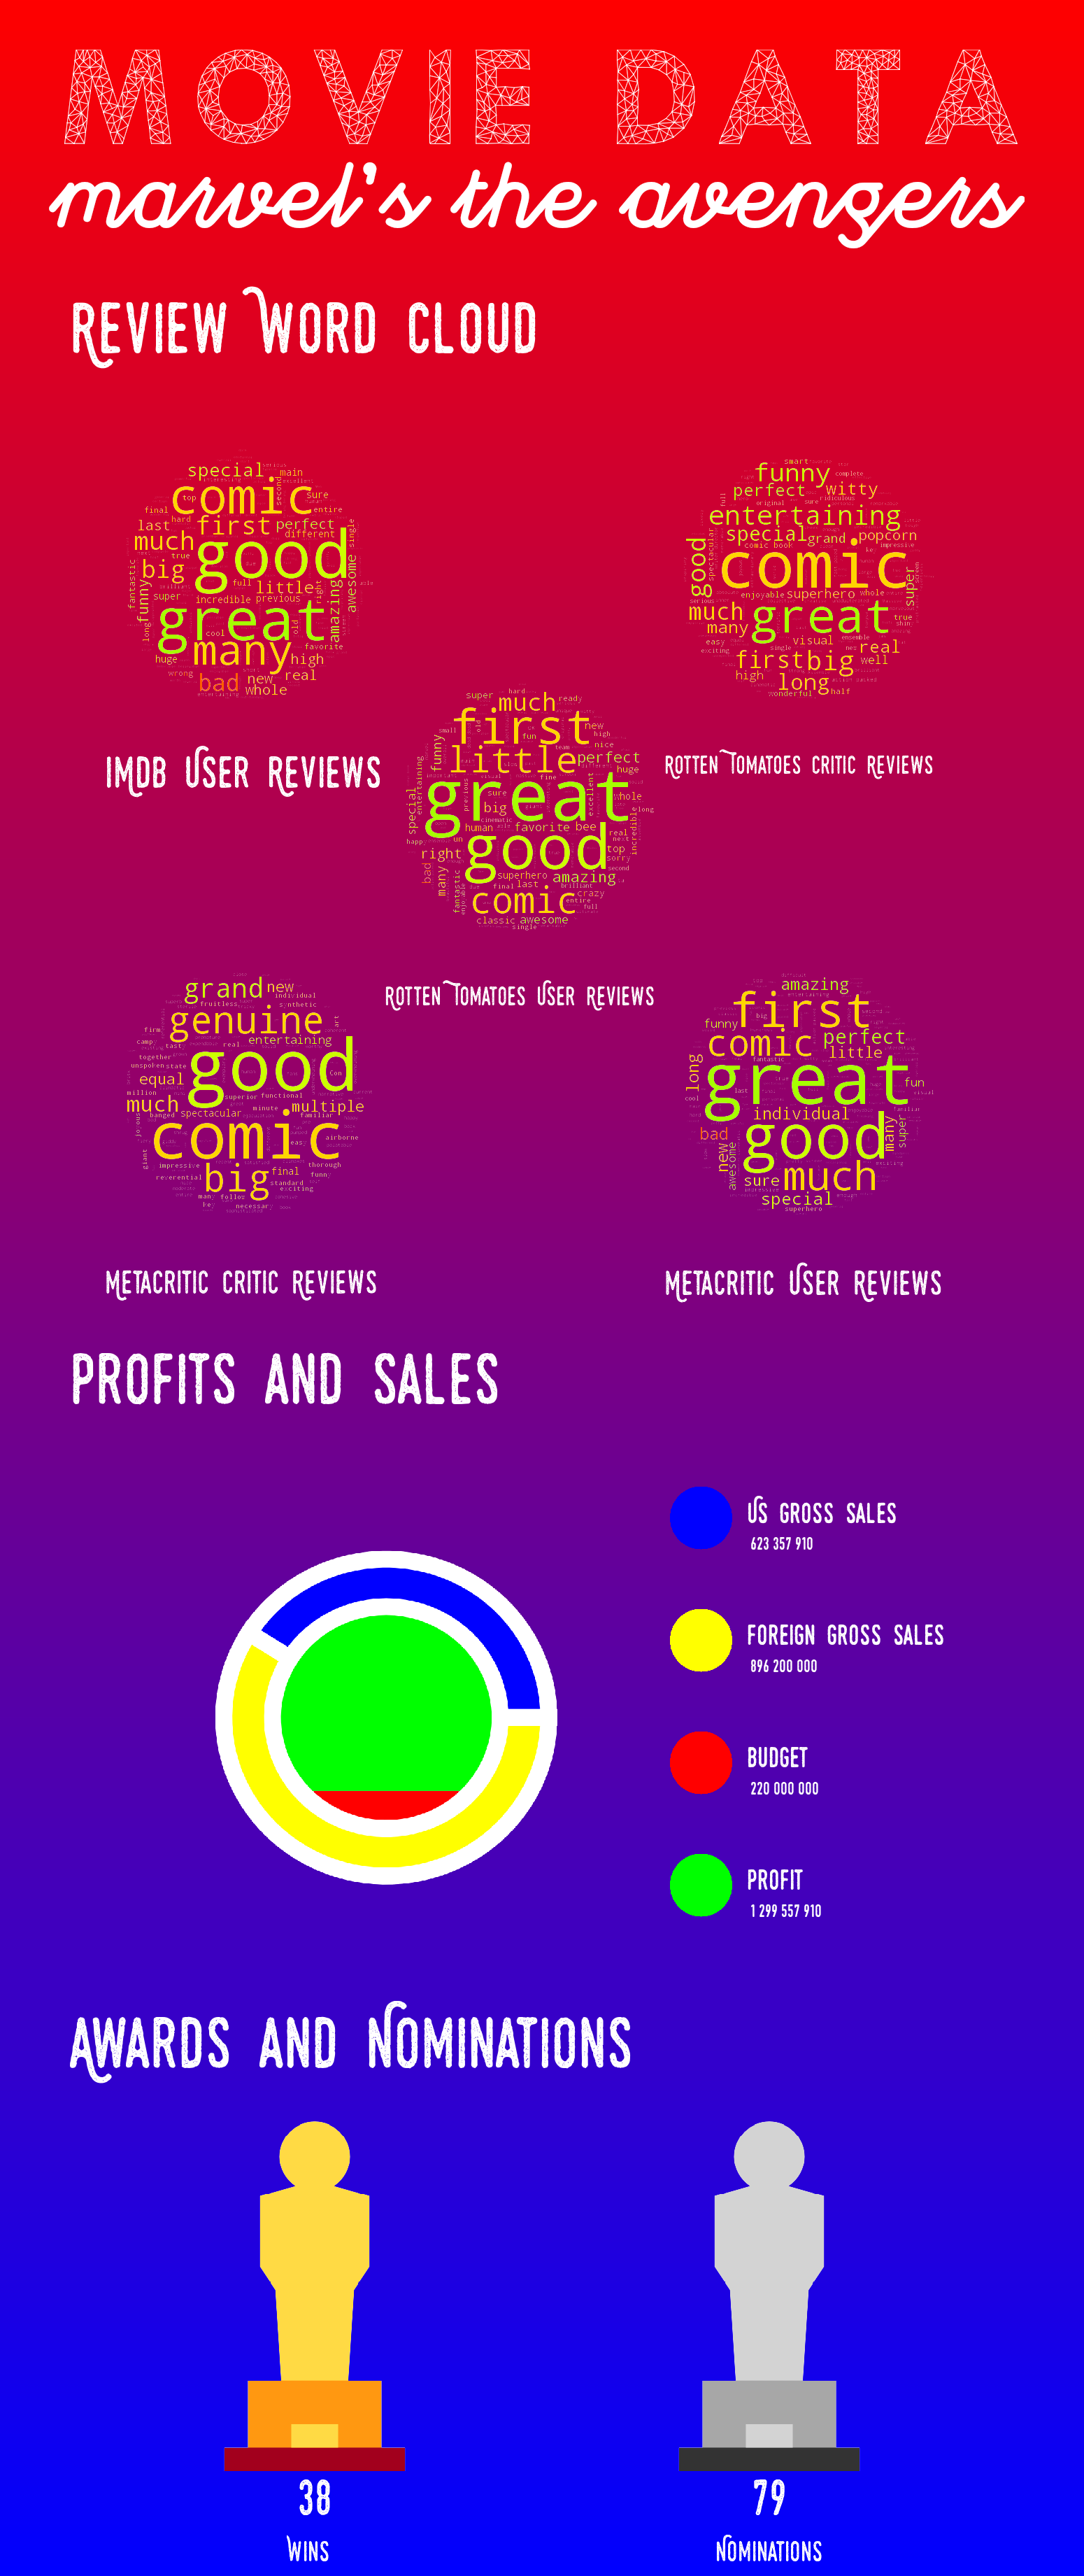

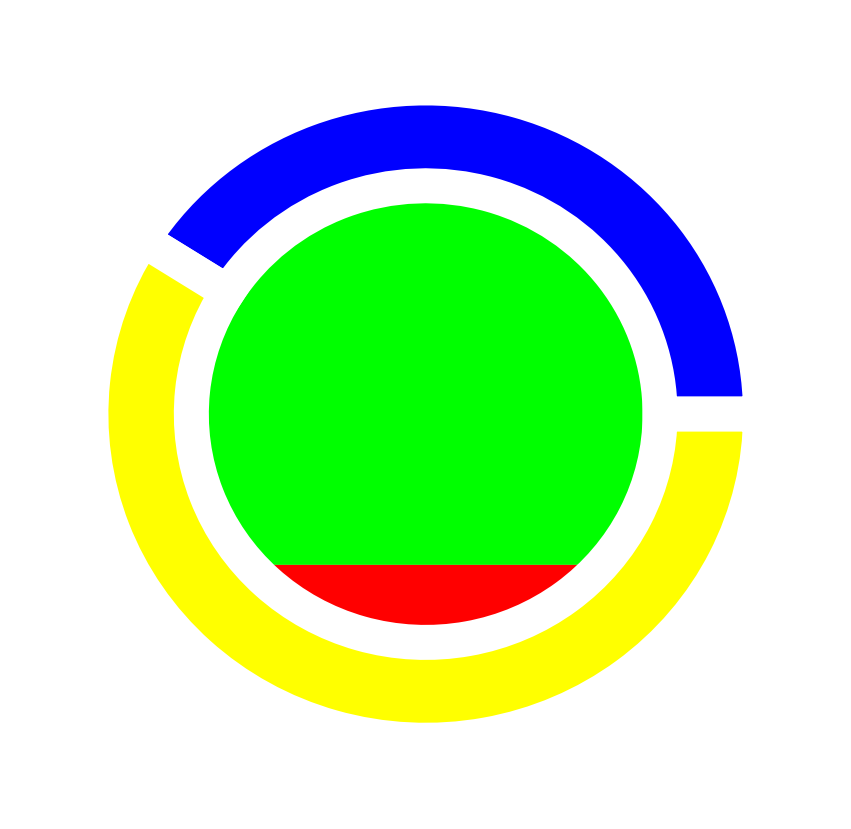

In [34]:
func_array = [{"func": bg, "keyname": "back", "title": "Background",
		"value": [{"name": "color1", "type": "text", "label": "Background Color Top", "value": ""},
			{"name": "color2", "type": "text", "label": "Background Color Bottom", "value": ""},
			{"name": "color3", "type": "text", "label": "Headers Color", "value": ""}]},
	{"func": title, "keyname": "titl", "title": "Title",
		"value": [{"name": "color1", "type": "text", "label": "Movie Data Text Color", "value": ""},
			{"name": "color2", "type": "text", "label": "Movie Title Text Color", "value": ""},
			{"name": "font2", "type": "select", "label": "Movie Title Text Font", "value": [{"value": font.split(".")[0].split("/")[-1]} for font in glob.glob("*.otf")]}]},
	{"func": review, "keyname": "rvwc", "title": "Review Word Cloud",
		"value": [{"name": "color1", "type": "text", "label": "Word Cloud Label Color", "value": ""},
			{"name": "review_places_imdb_u", "type": "checkbox", "label": "Get Reviews from IMDb Users", "value": "imdb_user"},
			{"name": "review_places_rotten_c", "type": "checkbox", "label": "Get Reviews from Rotten Tomatoes Critics", "value": "rotten_critic"},
			{"name": "review_places_rotten_u", "type": "checkbox", "label": "Get Reviews from Rotten Tomatoes Users", "value": "rotten_user"},
			{"name": "review_places_meta_c", "type": "checkbox", "label": "Get Reviews from Metacritic Critics", "value": "meta_critic"},
			{"name": "review_places_meta_u", "type": "checkbox", "label": "Get Reviews from Metacritic Users", "value": "meta_user"}]},
	{"func": profits, "keyname": "prft", "title": "Profits and Sales Breakdown",
		"value": [{"name": "color1", "type": "text", "label": "Text Color", "value": ""}]},
	{"func": awards, "keyname": "awrd", "title": "Awards and Nominations",
		"value": [{"name": "color1", "type": "text", "label": "Text Color", "value": ""}]}]

url = "/m/marvels_the_avengers"
data = [{"keyname": "back", "value": {"color1": "ff0000", "color2": "0000ff", "color3": "ffffff"}},
       {"keyname": "titl", "value": {"color1": "ffffff", "color2": "ffffff", "font2": "antre.otf"}},
       {"keyname": "rvwc", "value": {"color1": "ffffff", "review_places_imdb_u": True, "review_places_rotten_c": True, "review_places_rotten_u": True, "review_places_meta_c": True, "review_places_meta_u": True}},
       {"keyname": "prft", "value": {"color1": "ffffff"}},
       {"keyname": "awrd", "value": {"color1": "ffffff"}}]

sections = []
bkimgfunc = bg
bkimgdata = {}
for d in data:
  if d["keyname"] == "back":
    for f in func_array:
      if d["keyname"] == f["keyname"]:
        bkimgfunc = f["func"]
        bkimgdata = d["value"]
  else:
    for f in func_array:
      if d["keyname"] == f["keyname"]:
        sections.append(f["func"](url, d["value"]))
bkimgfunc(bkimgdata, sections)